In [58]:
import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno

from scipy.cluster import hierarchy

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [59]:
data_url = 'https://raw.githubusercontent.com/mo-amininasab/customers_segmentation/master/Mall_Customers.csv'
data = pd.read_csv(data_url)

In [60]:
data.shape

(200, 5)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [62]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [63]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Missing data

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

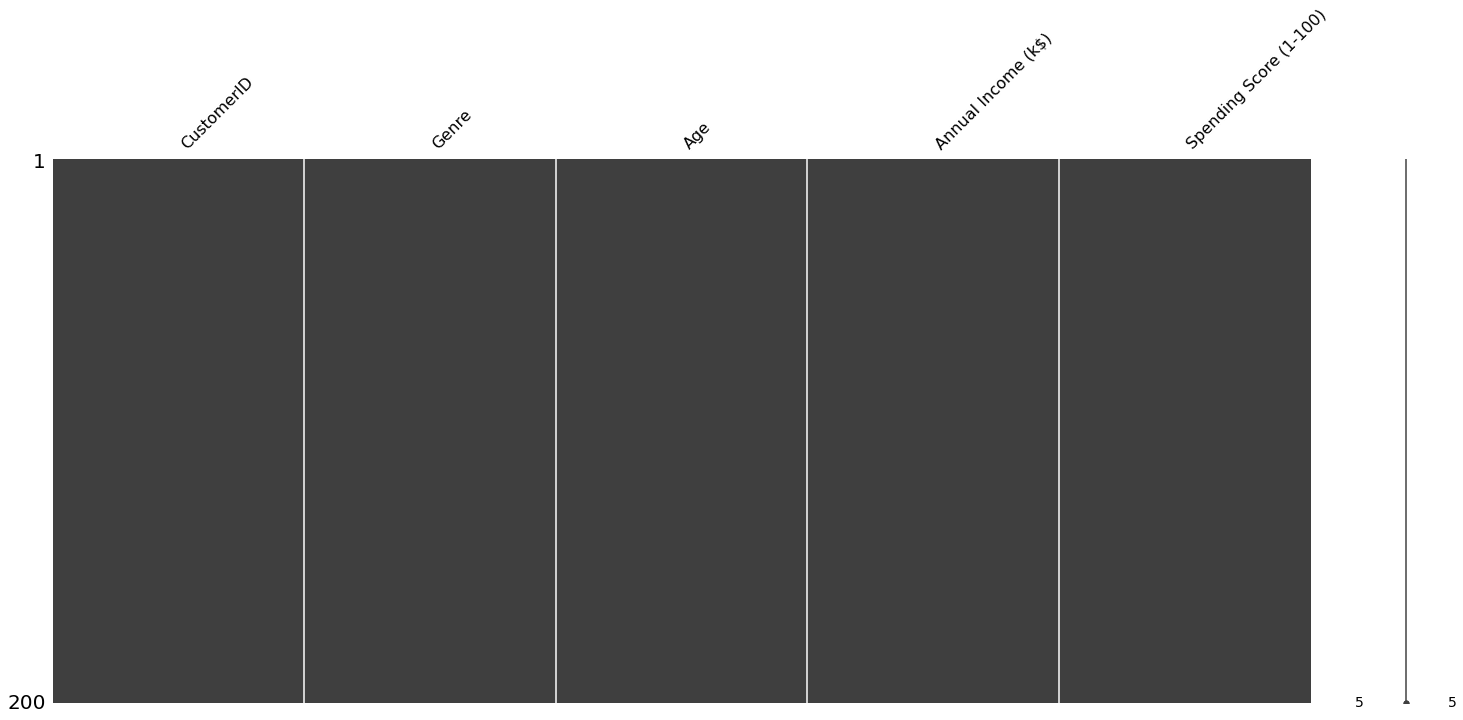

In [64]:
missingno.matrix(data)
data.isna().sum()

## Visualize

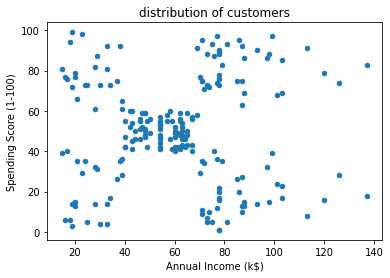

In [65]:
plt.scatter(data['Annual Income (k$)'],
            data['Spending Score (1-100)'],
            s=20)

plt.title('distribution of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Model comparisons - *Agglomerative*, *K-means*


In [66]:
X = data.iloc[:, [3, 4]].values

### Agglomerative

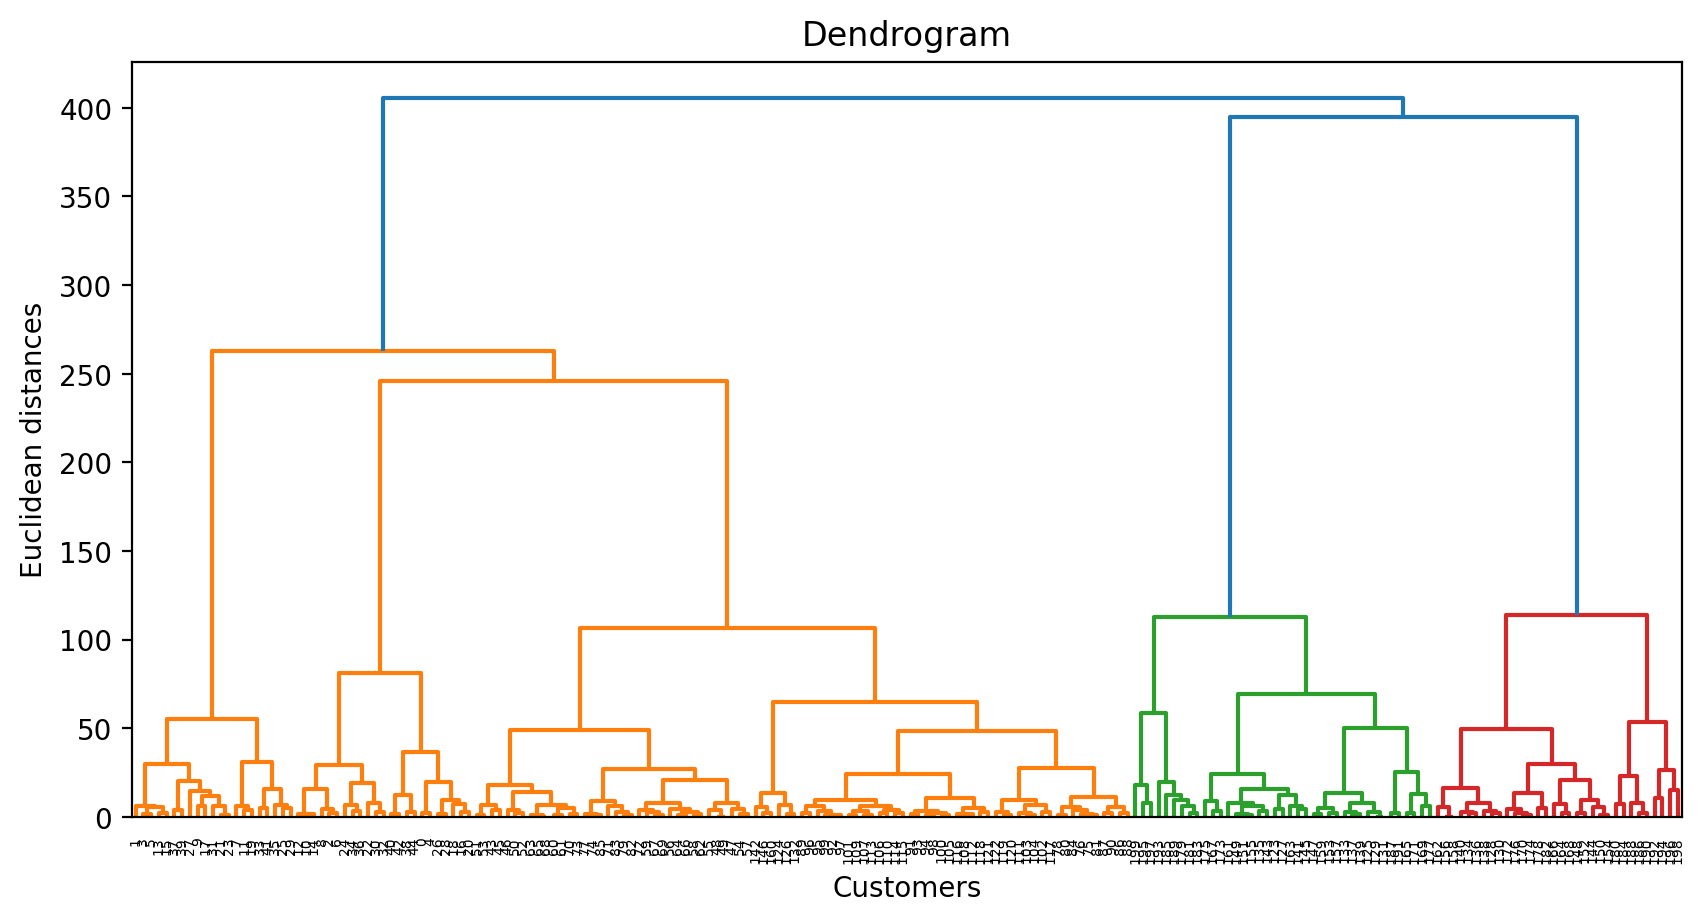

In [67]:
plt.figure(figsize=(10, 5), dpi=200)
dendro = hierarchy.dendrogram(hierarchy.linkage(X, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [68]:
hc = AgglomerativeClustering(n_clusters=5,
                             affinity='euclidean',
                             linkage='ward')
y_hc = hc.fit_predict(X)

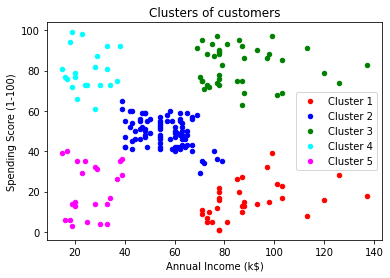

In [69]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=20, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0],
            X[y_hc == 1, 1],
            s=20,
            c='blue',
            label='Cluster 2')
plt.scatter(X[y_hc == 2, 0],
            X[y_hc == 2, 1],
            s=20,
            c='green',
            label='Cluster 3')
plt.scatter(X[y_hc == 3, 0],
            X[y_hc == 3, 1],
            s=20,
            c='cyan',
            label='Cluster 4')
plt.scatter(X[y_hc == 4, 0],
            X[y_hc == 4, 1],
            s=20,
            c='magenta',
            label='Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()